In [7]:
#BILST_CNN

C:\Users\Basia\AppData\Local\Temp\ipykernel_5516\342518153.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Capital"][0] = 1
C:\Users\Basia\AppData\Local\Temp\ipykernel_5516\342518153.py:14: SettingWithCopyWarning: 
A value is trying

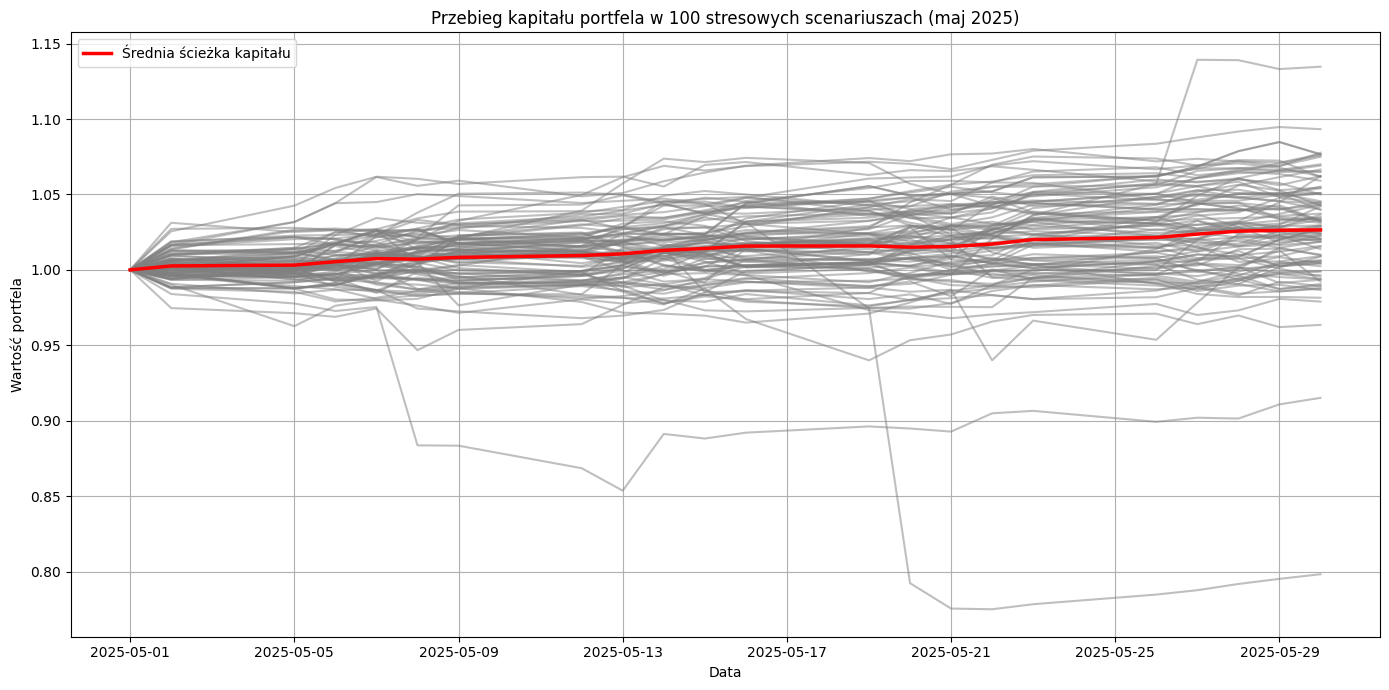

Date
2025-05-30    1.026487
Name: Capital, dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

results_dir = r"C:\Users\Basia\Do przejrzenia\am_sem2\mgr\kody\rolling_results_bilstm_v2"
all_files = sorted(glob.glob(os.path.join(results_dir, "capital_bilstm_iter_*.csv")))

all_results = []
for file in all_files:
    try:
        df = pd.read_csv(file, names=["Date", "Capital"], parse_dates=["Date"], header=None, skiprows=1)
        df["Scenario_ID"] = os.path.splitext(os.path.basename(file))[0].split("_")[-1].replace(".csv", "")
        df["Capital"][0] = 1
        all_results.append(df)
    except Exception as e:
        print(f"Błąd wczytywania pliku {file}: {e}")

df_all_scenarios = pd.concat(all_results, ignore_index=True)

# === Wykres wszystkich scenariuszy + średnia ===
plt.figure(figsize=(14, 7))
for scen_id, group in df_all_scenarios.groupby("Scenario_ID"):
    plt.plot(group["Date"],  group["Capital"], alpha=0.5, color="grey")

# Średnia ścieżka kapitału
mean_path = df_all_scenarios.groupby("Date")["Capital"].mean()
plt.plot(mean_path.index, mean_path.values, color="red", linewidth=2.5, label="Średnia ścieżka kapitału")

plt.title("Przebieg kapitału portfela w 100 stresowych scenariuszach (maj 2025)")
plt.xlabel("Data")
plt.ylabel("Wartość portfela")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(mean_path.tail(1))

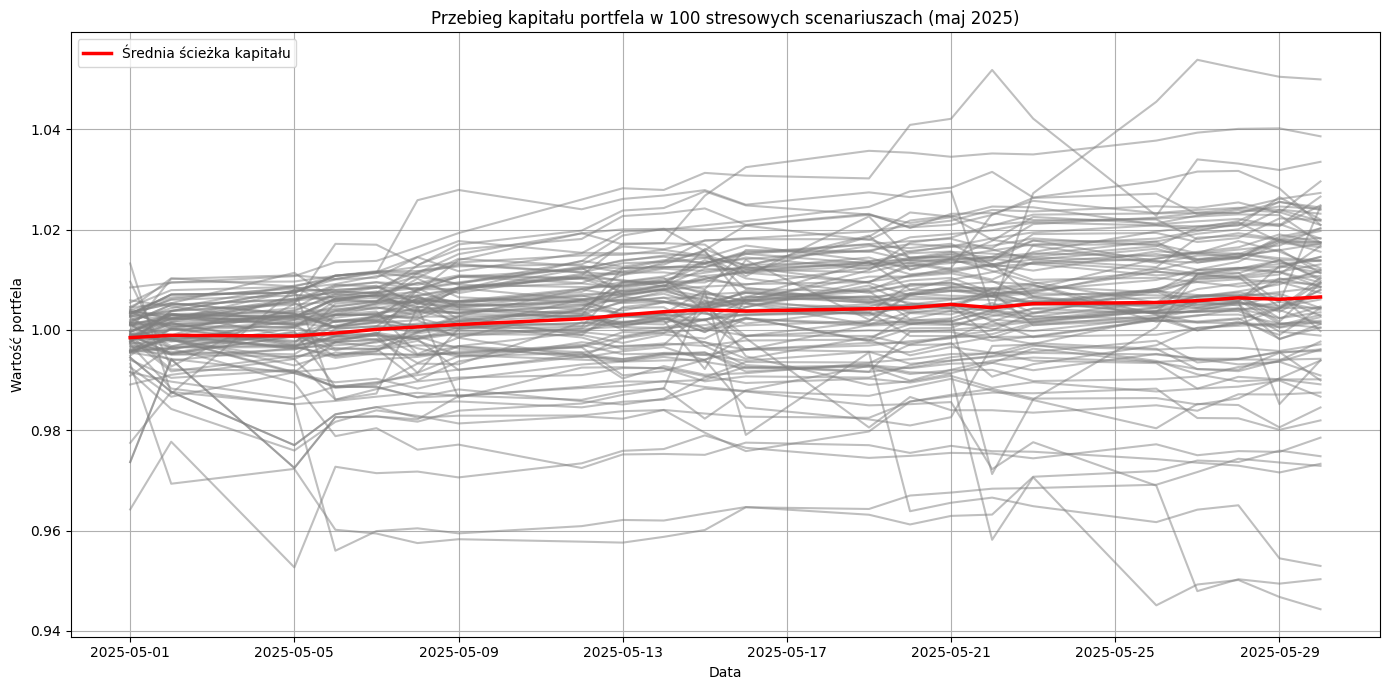

Date
2025-05-30    1.006574
Name: Capital, dtype: float64


In [9]:

import matplotlib.pyplot as plt
import os
import glob

results_dir = r"C:\Users\Basia\Do przejrzenia\am_sem2\mgr\kody\rolling_results_markowitz"
all_files = sorted(glob.glob(os.path.join(results_dir, "capital_iteration_*.csv")))

all_results = []
for file in all_files:
    try:
        df = pd.read_csv(file, names=["Date", "Capital"], parse_dates=["Date"], header=None, skiprows=1)
        df["Scenario_ID"] = os.path.splitext(os.path.basename(file))[0].split("_")[-1].replace(".csv", "")
  
        all_results.append(df)
    except Exception as e:
        print(f"Błąd wczytywania pliku {file}: {e}")

df_all_scenarios = pd.concat(all_results, ignore_index=True)

# === Wykres wszystkich scenariuszy + średnia ===
plt.figure(figsize=(14, 7))
for scen_id, group in df_all_scenarios.groupby("Scenario_ID"):
    plt.plot(group["Date"][-22:],  group["Capital"][-22:], alpha=0.5, color="grey")

# Średnia ścieżka kapitału
mean_path = df_all_scenarios.groupby("Date")["Capital"].mean()
plt.plot(mean_path.index[-22:], mean_path.values[-22:], color="red", linewidth=2.5, label="Średnia ścieżka kapitału")

plt.title("Przebieg kapitału portfela w 100 stresowych scenariuszach (maj 2025)")
plt.xlabel("Data")
plt.ylabel("Wartość portfela")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(mean_path.tail(1))

In [136]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def set_consistent_plot_style():
    mpl.rcParams.update({
        # Rozmiar i DPI
        "figure.figsize": (6, 4),
        "figure.dpi": 100,

        # Czcionki
        "font.family": "serif",
        "font.size": 18,
        "axes.titlesize": 24,
        "axes.labelsize": 15,
        "xtick.labelsize": 13,
        "ytick.labelsize": 13,

        # Linie
        "lines.linewidth": 2,
        "lines.markersize": 6,

     
        # Siatka
        "axes.grid": True,
        "grid.alpha": 0.3,

        # Legenda
        "legend.fontsize": 14,
        "legend.frameon": True,
        "legend.loc": "best",

        # Zapis do pliku
        "savefig.bbox": "tight",
        "savefig.dpi": 300,
        "pdf.fonttype": 42,
        "ps.fonttype": 42,

        # Styl linii siatki
        "grid.linestyle": "--"
    })

# Wywołanie
set_consistent_plot_style()


In [137]:
import pandas as pd
import os
import glob

def prepare_bilstm_df(results_dir):
    """
    Loads all capital paths for the BiLSTM model and returns a long-format DataFrame:
    columns: Date, Iteration, Capital, Model
    """
    pattern = os.path.join(results_dir, "capital_bilstm_iter_*.csv")
    all_files = sorted(glob.glob(pattern))
    all_results = []

    for file in all_files:
        try:
            df = pd.read_csv(file, header=None, names=["Date", "Capital"], parse_dates=["Date"], skiprows=1)
            iteration_id = os.path.splitext(os.path.basename(file))[0].split("_")[-1]
            df["Iteration"] = f"Iteration_{iteration_id}"
            df["Model"] = "BiLSTM"
            df.iloc[0, df.columns.get_loc("Capital")] = 1.0  # Ensure start at 1.0
            all_results.append(df)
        except Exception as e:
            print(f"❌ Error in {file}: {e}")

    if all_results:
        df_bilstm = pd.concat(all_results, ignore_index=True)
        return df_bilstm[["Date", "Iteration", "Capital", "Model"]]
    else:
        print("⚠️ No files loaded for BiLSTM.")
        return pd.DataFrame(columns=["Date", "Iteration", "Capital", "Model"])


In [138]:
results_dir_bilstm = r"C:\Users\Basia\Do przejrzenia\am_sem2\mgr\kody\rolling_results_bilstm_v2"
df_bilstm = prepare_bilstm_df(results_dir_bilstm)
df_bilstm

,Date,Iteration,Capital,Model
0,2025-05-01,Iteration_1,1.000000,BiLSTM
1,2025-05-02,Iteration_1,1.001413,BiLSTM
2,2025-05-05,Iteration_1,0.998177,BiLSTM
3,2025-05-06,Iteration_1,1.002451,BiLSTM
4,2025-05-07,Iteration_1,1.002805,BiLSTM
...,...,...,...,...
2173,2025-05-26,Iteration_99,1.013720,BiLSTM
2174,2025-05-27,Iteration_99,1.025962,BiLSTM
2175,2025-05-28,Iteration_99,1.026685,BiLSTM
2176,2025-05-29,Iteration_99,1.026792,BiLSTM


In [139]:
def prepare_mdpp_df(filepath):
    """
    Loads the combined capital CSV for MDPP and returns a long-format DataFrame:
    columns: Date, Iteration, Capital, Model
    """
    try:
        df_raw = pd.read_csv(filepath, parse_dates=[0])
        df_raw.rename(columns={df_raw.columns[0]: "Date"}, inplace=True)

        # Convert wide to long format
        df_long = df_raw.melt(id_vars=["Date"], var_name="Iteration", value_name="Capital")
        df_long["Model"] = "MDPP"

        return df_long[["Date", "Iteration", "Capital", "Model"]]
    
    except Exception as e:
        print(f"❌ Error loading MDPP file: {e}")
        return pd.DataFrame(columns=["Date", "Iteration", "Capital", "Model"])


In [140]:
results_dir_mdpp =  r"C:\Users\Basia\Do przejrzenia\am_sem2\mgr\kody\rolling_results_mdpp\combined_capital.csv"
df_mdpp = prepare_mdpp_df(results_dir_mdpp)
df_mdpp

,Date,Iteration,Capital,Model
0,2025-05-01,Iteration_1,1.000000,MDPP
1,2025-05-02,Iteration_1,0.999992,MDPP
2,2025-05-05,Iteration_1,1.002373,MDPP
3,2025-05-06,Iteration_1,0.997670,MDPP
4,2025-05-07,Iteration_1,1.003234,MDPP
...,...,...,...,...
2195,2025-05-26,Iteration_100,0.986603,MDPP
2196,2025-05-27,Iteration_100,0.985526,MDPP
2197,2025-05-28,Iteration_100,0.988462,MDPP
2198,2025-05-29,Iteration_100,0.988417,MDPP


In [141]:
def prepare_psoema_df(results_dir):
    """
    Loads capital_iteration_*.csv files for PSO EMA model and returns a long-format DataFrame.
    columns: Date, Iteration, Capital, Model
    """
    pattern = os.path.join(results_dir, "capital_iteration_*.csv")
    all_files = sorted(glob.glob(pattern))
    all_results = []

    for file in all_files:
        try:
            df = pd.read_csv(file, header=None, names=["Date", "Capital"], parse_dates=["Date"], skiprows=1)
            iteration_id = os.path.splitext(os.path.basename(file))[0].split("_")[-1]
            df["Iteration"] = f"Iteration_{iteration_id}"
            df["Model"] = "PSO_EMA"
            #df.iloc[0, df.columns.get_loc("Capital")] = 1.0  # Start value normalization
            all_results.append(df)
        except Exception as e:
            print(f"❌ Error in {file}: {e}")

    if all_results:
        df_psoema = pd.concat(all_results, ignore_index=True)
        return df_psoema[["Date", "Iteration", "Capital", "Model"]]
    else:
        print("⚠️ No PSO EMA capital files loaded.")
        return pd.DataFrame(columns=["Date", "Iteration", "Capital", "Model"])


In [142]:
results_dir_psoema = r"C:\Users\Basia\Do przejrzenia\am_sem2\mgr\kody\rolling_results_ema"
df_psoema = prepare_psoema_df(results_dir_psoema)
df_psoema

,Date,Iteration,Capital,Model
0,2025-05-02,Iteration_1,1.000000,PSO_EMA
1,2025-05-05,Iteration_1,0.994273,PSO_EMA
2,2025-05-06,Iteration_1,0.994650,PSO_EMA
3,2025-05-07,Iteration_1,0.998604,PSO_EMA
4,2025-05-08,Iteration_1,0.984266,PSO_EMA
...,...,...,...,...
2165,2025-05-26,Iteration_99,1.006091,PSO_EMA
2166,2025-05-27,Iteration_99,1.006032,PSO_EMA
2167,2025-05-28,Iteration_99,1.007832,PSO_EMA
2168,2025-05-29,Iteration_99,1.009008,PSO_EMA


In [143]:
def prepare_markowitz_df(filepath):
    """
    Loads the combined capital CSV for Markowitz model and returns a long-format DataFrame.
    Ensures each iteration starts at Capital = 1.0 on 2025-05-01.
    """
    try:
        df_raw = pd.read_csv(filepath, parse_dates=[0])
        df_raw.rename(columns={df_raw.columns[0]: "Date"}, inplace=True)

        # Convert wide to long format
        df_long = df_raw.melt(id_vars=["Date"], var_name="Iteration", value_name="Capital")
        df_long["Model"] = "Markowitz"

        # Filter dates
        df_long = df_long[df_long["Date"] >= pd.Timestamp("2025-05-01")]

        # Ustaw wartość startową 1.0 dla każdej iteracji na dacie 2025-05-01
        idx_start = df_long["Date"] == pd.Timestamp("2025-05-01")
        df_long.loc[idx_start, "Capital"] = 1.0

        return df_long[["Date", "Iteration", "Capital", "Model"]]

    except Exception as e:
        print(f"❌ Error loading Markowitz file: {e}")
        return pd.DataFrame(columns=["Date", "Iteration", "Capital", "Model"])


In [144]:
path_markowitz = r"C:\Users\Basia\Do przejrzenia\am_sem2\mgr\kody\rolling_results_markowitz\combined_capital.csv"
df_markowitz = prepare_markowitz_df(path_markowitz)
df_markowitz

,Date,Iteration,Capital,Model
86,2025-05-01,Iteration_1,1.000000,Markowitz
87,2025-05-02,Iteration_1,1.003152,Markowitz
88,2025-05-05,Iteration_1,1.003772,Markowitz
89,2025-05-06,Iteration_1,1.007218,Markowitz
90,2025-05-07,Iteration_1,1.006639,Markowitz
...,...,...,...,...
10795,2025-05-26,Iteration_100,0.997854,Markowitz
10796,2025-05-27,Iteration_100,0.993522,Markowitz
10797,2025-05-28,Iteration_100,0.994189,Markowitz
10798,2025-05-29,Iteration_100,0.995580,Markowitz


In [145]:
def prepare_psoraw_df(results_dir):
    """
    Loads capital_iteration_*.csv files for PSO RAW model and returns a long-format DataFrame.
    Inserts a missing starting value for 2025-05-01 with Capital = 1.0 for each iteration.
    """
    pattern = os.path.join(results_dir, "capital_iteration_*.csv")
    all_files = sorted(glob.glob(pattern))
    all_results = []

    for file in all_files:
        try:
            df = pd.read_csv(file, header=None, names=["Date", "Capital"], parse_dates=["Date"], skiprows=1)
            iteration_id = os.path.splitext(os.path.basename(file))[0].split("_")[-1]
            df["Iteration"] = f"Iteration_{iteration_id}"
            df["Model"] = "PSO_RAW"

            # Dodaj brakujący pierwszy dzień z wartością 1.0
            first_row = pd.DataFrame({
                "Date": [pd.Timestamp("2025-05-01")],
                "Capital": [1.0],
                "Iteration": [f"Iteration_{iteration_id}"],
                "Model": ["PSO_RAW"]
            })

            df = pd.concat([first_row, df], ignore_index=True)
            all_results.append(df)

        except Exception as e:
            print(f"❌ Error in {file}: {e}")

    if all_results:
        df_psoraw = pd.concat(all_results, ignore_index=True)
        return df_psoraw[["Date", "Iteration", "Capital", "Model"]]
    else:
        print("⚠️ No PSO RAW capital files loaded.")
        return pd.DataFrame(columns=["Date", "Iteration", "Capital", "Model"])


In [146]:
results_dir_psoraw = r"C:\Users\Basia\Do przejrzenia\am_sem2\mgr\kody\rolling_results_raw2"
df_psoraw = prepare_psoraw_df(results_dir_psoraw)
df_psoraw

,Date,Iteration,Capital,Model
0,2025-05-01,Iteration_1,1.000000,PSO_RAW
1,2025-05-02,Iteration_1,1.000000,PSO_RAW
2,2025-05-05,Iteration_1,0.991306,PSO_RAW
3,2025-05-06,Iteration_1,1.017997,PSO_RAW
4,2025-05-07,Iteration_1,1.010295,PSO_RAW
...,...,...,...,...
2195,2025-05-26,Iteration_99,1.059270,PSO_RAW
2196,2025-05-27,Iteration_99,1.064532,PSO_RAW
2197,2025-05-28,Iteration_99,1.074090,PSO_RAW
2198,2025-05-29,Iteration_99,1.060614,PSO_RAW


In [193]:
def plot_all_models(df_all, models, save_path=None):
    """
    Plots one stress path chart per model (grey paths + red average), stacked vertically.
    Each subplot gets its own Y-scale (no sharey). Output is saved as PDF.
    Adds global title and shared legend.
    """
    import matplotlib.pyplot as plt

    n_models = len(models)
    fig, axes = plt.subplots(n_models, 1, figsize=(15, 4 * n_models), sharex=True, sharey=False)

    if n_models == 1:
        axes = [axes]

    for ax, model in zip(axes, models):
        df_model = df_all[df_all["Model"] == model]

        for _, group in df_model.groupby("Iteration"):
            ax.plot(group["Date"], group["Capital"], color="grey", alpha=0.5, linewidth=1)

        mean_path = df_model.groupby("Date")["Capital"].mean()
        ax.plot(mean_path.index, mean_path.values, color="red", linewidth=1.5, label="mean path")
        ax.legend()

        ax.set_title(f"{model}", fontsize=16, loc="left")
        ax.grid(True, linestyle="--", alpha=0.5)

        # Remove subplot frame
        for spine in ax.spines.values():
            spine.set_visible(False)

        ax.label_outer()

    # Oś i tytuł globalny
    axes[-1].set_xlabel("date", fontsize=18)
    fig.text(0.03, 0.5, "portfolio value", va='center', rotation='vertical', fontsize=18)
    fig.suptitle("Stress test capital paths for models", fontsize=20, y=0.995)

    

    plt.subplots_adjust( hspace=0.25, top=0.96)

    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, format='pdf', bbox_inches='tight')
        print(f"✅ Saved plot to: {save_path}")

    plt.show()


✅ Saved plot to: C:\Users\Basia\Do przejrzenia\am_sem2\mgr\plots\stress_paths_all_models.pdf


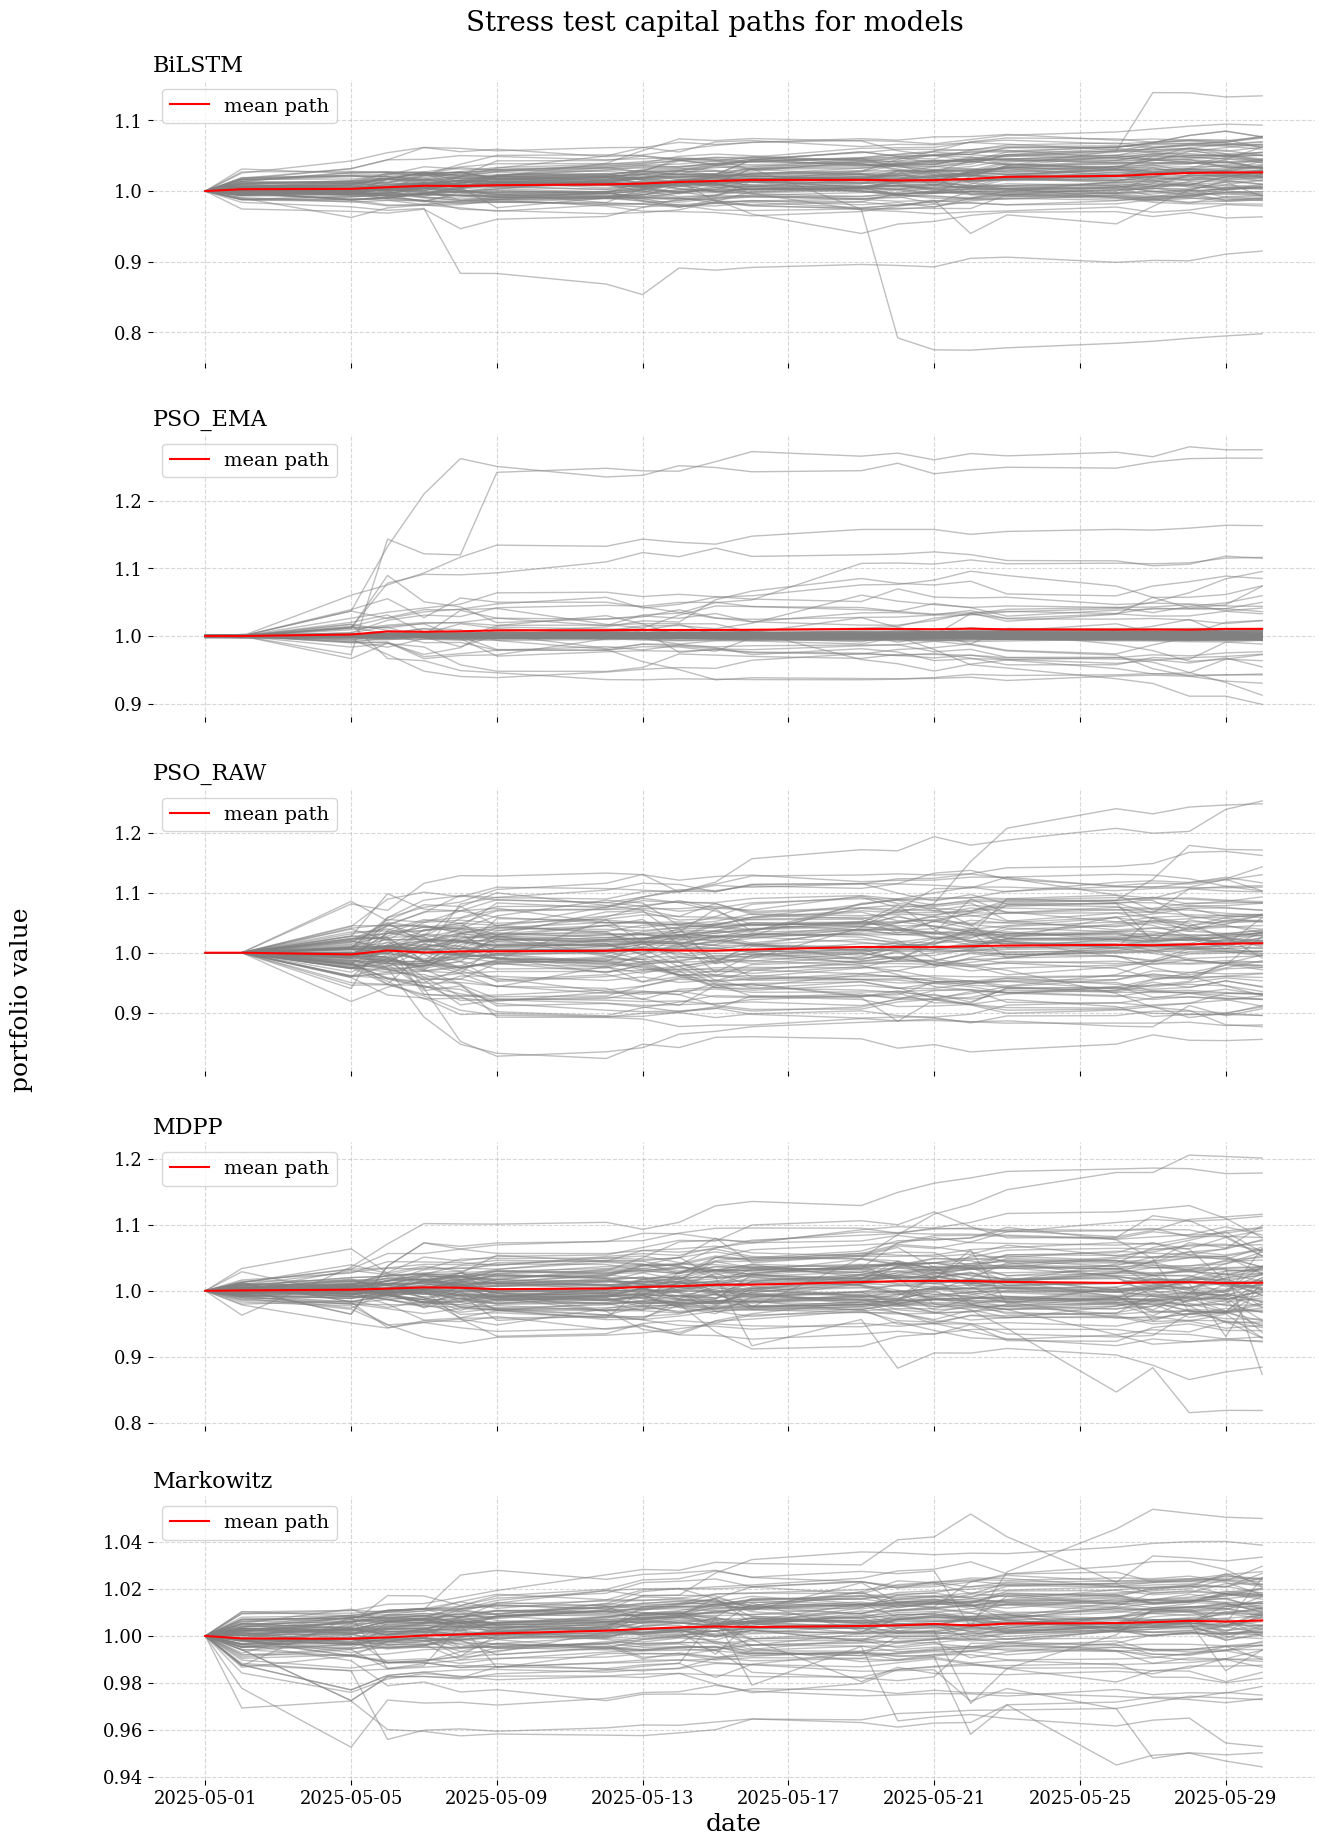

In [194]:
# Zakładamy, że masz wcześniej połączone dane:
df_all = pd.concat([df_bilstm, df_psoema, df_psoraw, df_mdpp, df_markowitz], ignore_index=True)

models = ["BiLSTM", "PSO_EMA", "PSO_RAW", "MDPP", "Markowitz"]
output_path = r"C:\Users\Basia\Do przejrzenia\am_sem2\mgr\plots\stress_paths_all_models.pdf"

plot_all_models(df_all, models, save_path=output_path)


In [149]:
# Tabela ze średnim końcowym wynikiem kapitału (FinalReturn) per model
mean_final_returns = df_all_metrics.groupby("Model")["FinalReturn"].mean().round(4).reset_index()

# Dodanie procentowego formatu jako string
mean_final_returns["FinalReturn (%)"] = (mean_final_returns["FinalReturn"] * 100).round(2).astype(str) + "%"

# Usunięcie kolumny surowej jeśli chcemy tylko wynik do publikacji
final_return_table = mean_final_returns[["Model", "FinalReturn (%)"]]

final_return_table


,Model,FinalReturn (%)
0,BiLSTM,2.65%
1,MDPP,1.22%
2,Markowitz,0.66%
3,PSO_EMA,1.07%
4,PSO_RAW,1.59%


In [150]:
def compute_metrics(df_all):
    """
    Computes final return, max drawdown, and volatility for each iteration and model.
    Returns a summary DataFrame: Model, Iteration, Return, MDD, Volatility
    """
    results = []

    for (model, iteration), group in df_all.groupby(["Model", "Iteration"]):
        group_sorted = group.sort_values("Date")
        capital = group_sorted["Capital"].values

        final_return = capital[-1] - 1.0
        volatility = capital.std()

        # Drawdown calculation
        running_max = pd.Series(capital).cummax()
        drawdowns = 1 - capital / running_max
        max_drawdown = drawdowns.max()

        results.append({
            "Model": model,
            "Iteration": iteration,
            "FinalReturn": final_return,
            "Volatility": volatility,
            "MaxDrawdown": max_drawdown
        })

    return pd.DataFrame(results)


In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(metrics_df, save_path=None):
    """
    Plots boxplots for FinalReturn, MaxDrawdown, and Volatility grouped by model.
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.boxplot(data=metrics_df, x="Model", y="FinalReturn", ax=axes[0], palette="pastel")
    axes[0].set_title("Final Return")
    axes[0].set_ylabel("Return")
    axes[0].axhline(0, color="black", linestyle="--", linewidth=0.5)

    sns.boxplot(data=metrics_df, x="Model", y="MaxDrawdown", ax=axes[1], palette="pastel")
    axes[1].set_title("Maximum Drawdown")
    axes[1].set_ylabel("Drawdown")

    sns.boxplot(data=metrics_df, x="Model", y="Volatility", ax=axes[2], palette="pastel")
    axes[2].set_title("Volatility")
    axes[2].set_ylabel("Standard Deviation")

    for ax in axes:
        ax.set_xlabel("")

    plt.suptitle("Distribution of stress test metrics per model", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, format="pdf")
        print(f"✅ Boxplot saved to: {save_path}")

    plt.show()


C:\Users\Basia\AppData\Local\Temp\ipykernel_19352\2440699343.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=metrics_df, x="Model", y="FinalReturn", ax=axes[0], palette="pastel")
C:\Users\Basia\AppData\Local\Temp\ipykernel_19352\2440699343.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=metrics_df, x="Model", y="MaxDrawdown", ax=axes[1], palette="pastel")
C:\Users\Basia\AppData\Local\Temp\ipykernel_19352\2440699343.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=metrics_df, x="Model", y="Volatility", ax=axes[2],

✅ Boxplot saved to: C:\Users\Basia\Do przejrzenia\am_sem2\mgr\plots\boxplot_metrics.pdf


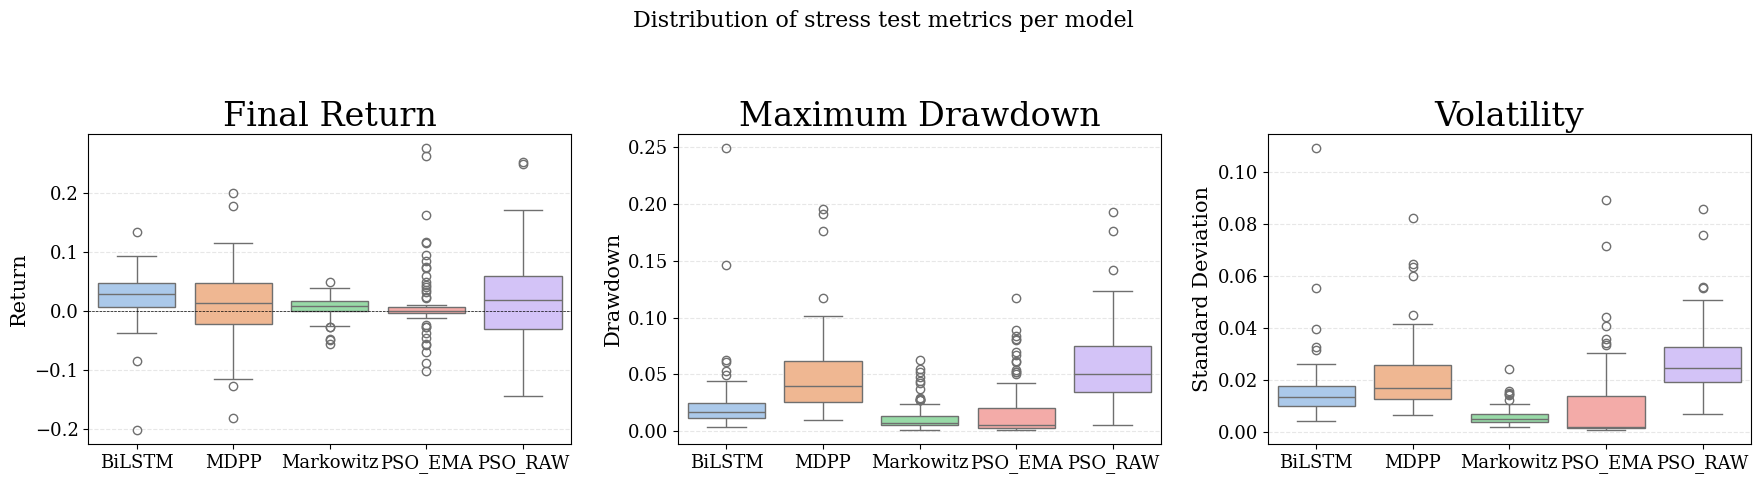

In [152]:
# Oblicz metryki
metrics_df = compute_metrics(df_all)

# Rysuj boxploty
boxplot_path = r"C:\Users\Basia\Do przejrzenia\am_sem2\mgr\plots\boxplot_metrics.pdf"
plot_boxplots(metrics_df, save_path=boxplot_path)


In [187]:
def plot_and_save_boxplot(metrics_df, metric, ylabel, title, save_path):
    """
    Plots a single boxplot for a given metric, removes axes frames, and saves it as a PDF.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os

    plt.figure(figsize=(13, 8))
    ax = sns.boxplot(data=metrics_df, x="Model", y=metric, palette="pastel")
    plt.xticks( ha='right', fontsize=18)

    plt.title(title, fontsize=22)
    plt.ylabel(ylabel, fontsize=18)
    plt.xlabel("", fontsize=18)

    if metric == "FinalReturn":
        plt.axhline(0, color="black", linestyle="--", linewidth=0.5)

    # Remove all frame borders (top, right, left, bottom)
    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()

    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(save_path, format="pdf", bbox_inches="tight")
    print(f"✅ Saved boxplot to: {save_path}")

    plt.show()


C:\Users\Basia\AppData\Local\Temp\ipykernel_19352\1965584451.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=metrics_df, x="Model", y=metric, palette="pastel")


✅ Saved boxplot to: C:\Users\Basia\Do przejrzenia\am_sem2\mgr\plots\boxplot_final_return.pdf


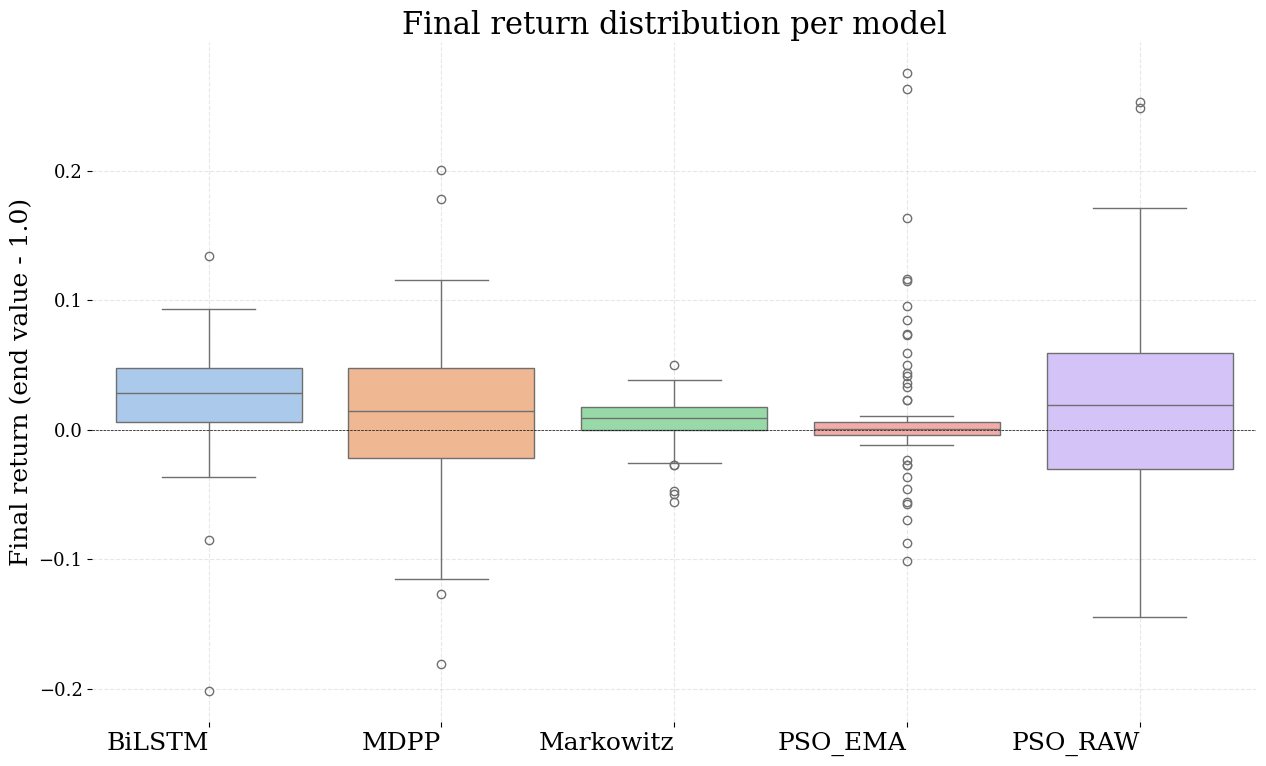

C:\Users\Basia\AppData\Local\Temp\ipykernel_19352\1965584451.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=metrics_df, x="Model", y=metric, palette="pastel")


✅ Saved boxplot to: C:\Users\Basia\Do przejrzenia\am_sem2\mgr\plots\boxplot_max_drawdown.pdf


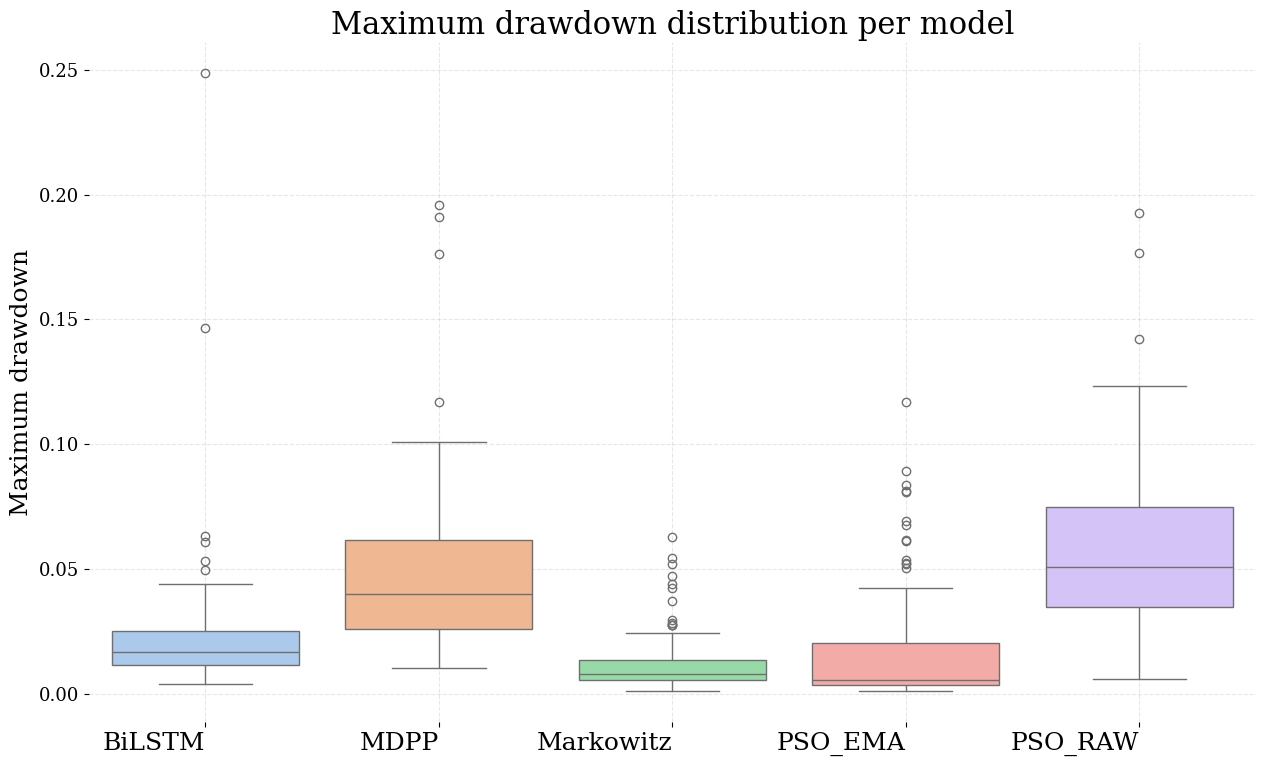

C:\Users\Basia\AppData\Local\Temp\ipykernel_19352\1965584451.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=metrics_df, x="Model", y=metric, palette="pastel")


✅ Saved boxplot to: C:\Users\Basia\Do przejrzenia\am_sem2\mgr\plots\boxplot_volatility.pdf


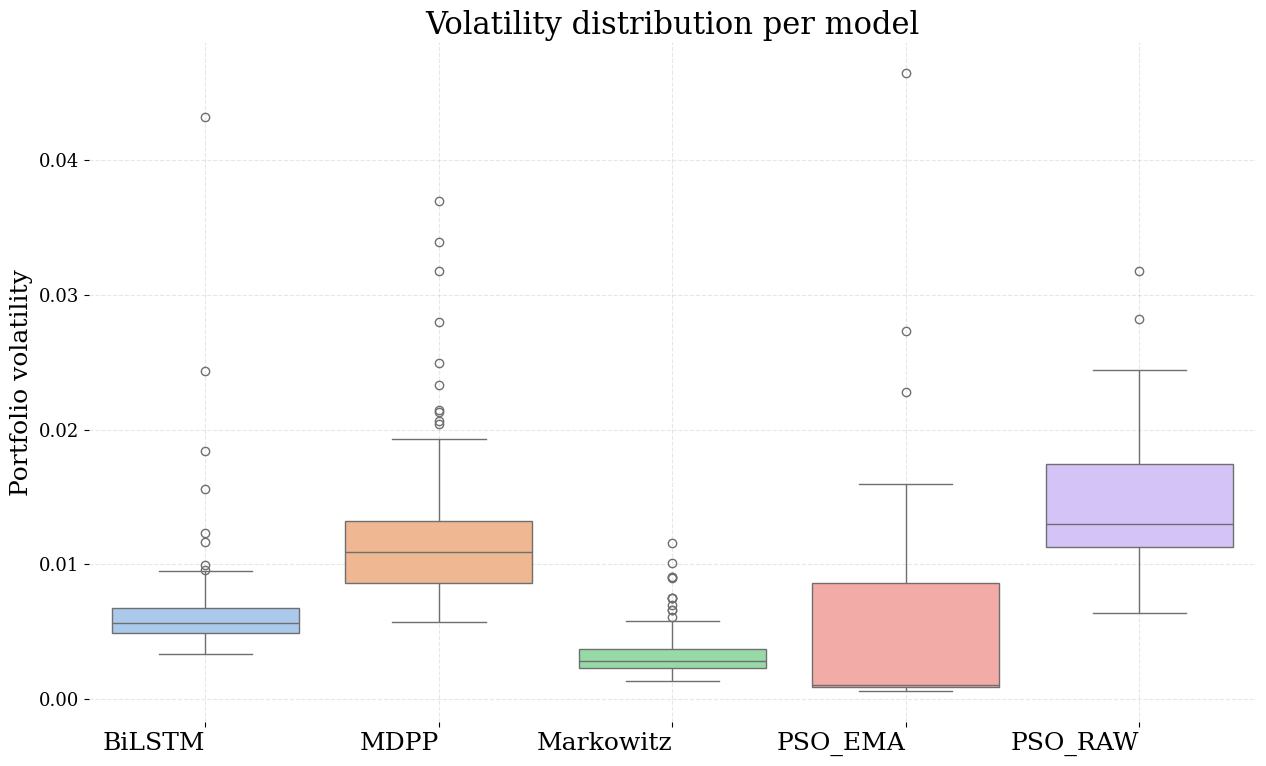

In [188]:
metrics_df = compute_metrics(df_all)

base_path = r"C:\Users\Basia\Do przejrzenia\am_sem2\mgr\plots"

# Final Return
plot_and_save_boxplot(
    metrics_df,
    metric="FinalReturn",
    ylabel="Final return (end value - 1.0)",
    title="Final return distribution per model",
    save_path=os.path.join(base_path, "boxplot_final_return.pdf")
)

# Maximum Drawdown
plot_and_save_boxplot(
    metrics_df,
    metric="MaxDrawdown",
    ylabel="Maximum drawdown",
    title="Maximum drawdown distribution per model",
    save_path=os.path.join(base_path, "boxplot_max_drawdown.pdf")
)

# Volatility
plot_and_save_boxplot(
    metrics_df,
    metric="Volatility",
    ylabel="Portfolio volatility",
    title="Volatility distribution per model",
    save_path=os.path.join(base_path, "boxplot_volatility.pdf")
)


In [177]:
def compute_metrics(df_all, risk_free_rate=0.0):
    """
    Computes performance metrics per iteration and model:
    FinalReturn, Volatility, MaxDrawdown, Sharpe, Sortino, Calmar.
    """
    results = []

    for (model, iteration), group in df_all.groupby(["Model", "Iteration"]):
        group = group.sort_values("Date")
        capital = group["Capital"].values
        returns = pd.Series(capital).pct_change().dropna()

        final_return = capital[-1] - 1.0
        volatility = returns.std()
        neg_returns = returns[returns < risk_free_rate]
        downside_dev = neg_returns.std()

        # Drawdown
        running_max = pd.Series(capital).cummax()
        drawdown = 1 - capital / running_max
        max_drawdown = drawdown.max()

        # Ratios
        sharpe = returns.mean() / volatility if volatility > 0 else 0
        sortino = returns.mean() / downside_dev if downside_dev > 0 else 0
        calmar = returns.mean() / max_drawdown if max_drawdown > 0 else 0

        results.append({
            "Model": model,
            "Iteration": iteration,
            "FinalReturn": final_return,
            "Volatility": volatility,
            "MaxDrawdown": max_drawdown,
            "Sharpe": sharpe,
            "Sortino": sortino,
            "Calmar": calmar
        })

    return pd.DataFrame(results)


In [189]:
def plot_and_save_boxplot(metrics_df, metric, ylabel, title, save_path):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os

    plt.figure(figsize=(13, 8))
    ax = sns.boxplot(data=metrics_df, x="Model", y=metric, palette="pastel")
    plt.xticks( ha='right', fontsize=18)

    plt.title(title, fontsize=22)
    plt.ylabel(ylabel, fontsize=18)
    plt.xlabel("", fontsize=18)

    if metric == "FinalReturn":
        plt.axhline(0, color="black", linestyle="--", linewidth=0.5)

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()

    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(save_path, format="pdf", bbox_inches="tight")
    print(f"✅ Saved boxplot to: {save_path}")

    plt.show()


C:\Users\Basia\AppData\Local\Temp\ipykernel_19352\1865472765.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=metrics_df, x="Model", y=metric, palette="pastel")


✅ Saved boxplot to: C:\Users\Basia\Do przejrzenia\am_sem2\mgr\plots\boxplot_sharpe.pdf


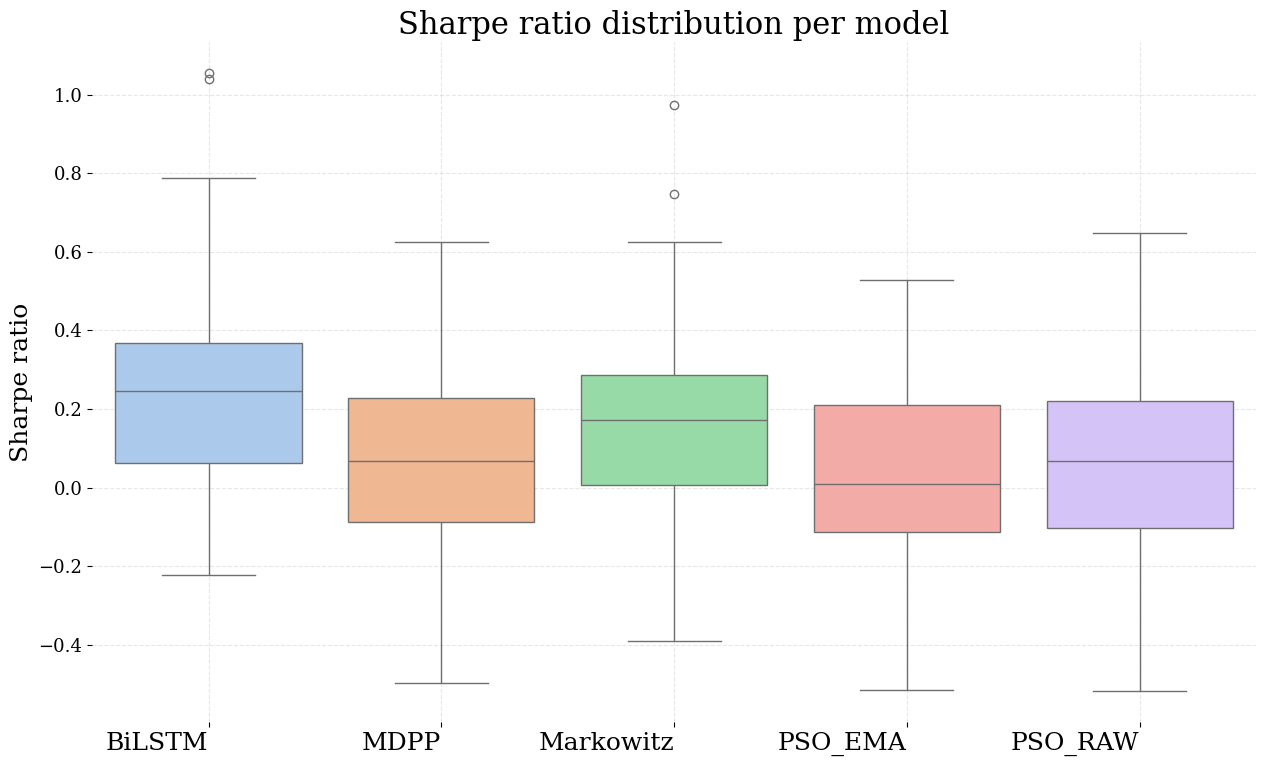

C:\Users\Basia\AppData\Local\Temp\ipykernel_19352\1865472765.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=metrics_df, x="Model", y=metric, palette="pastel")


✅ Saved boxplot to: C:\Users\Basia\Do przejrzenia\am_sem2\mgr\plots\boxplot_sortino.pdf


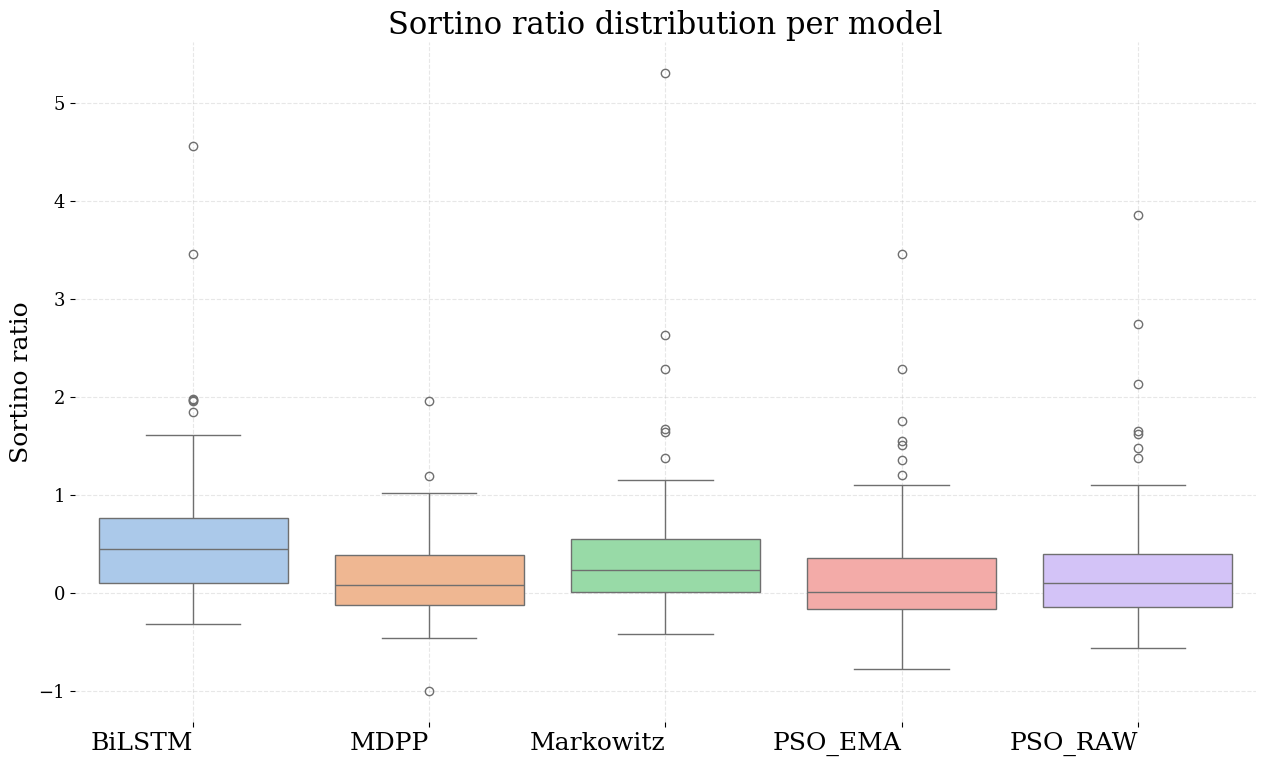

C:\Users\Basia\AppData\Local\Temp\ipykernel_19352\1865472765.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=metrics_df, x="Model", y=metric, palette="pastel")


✅ Saved boxplot to: C:\Users\Basia\Do przejrzenia\am_sem2\mgr\plots\boxplot_calmar.pdf


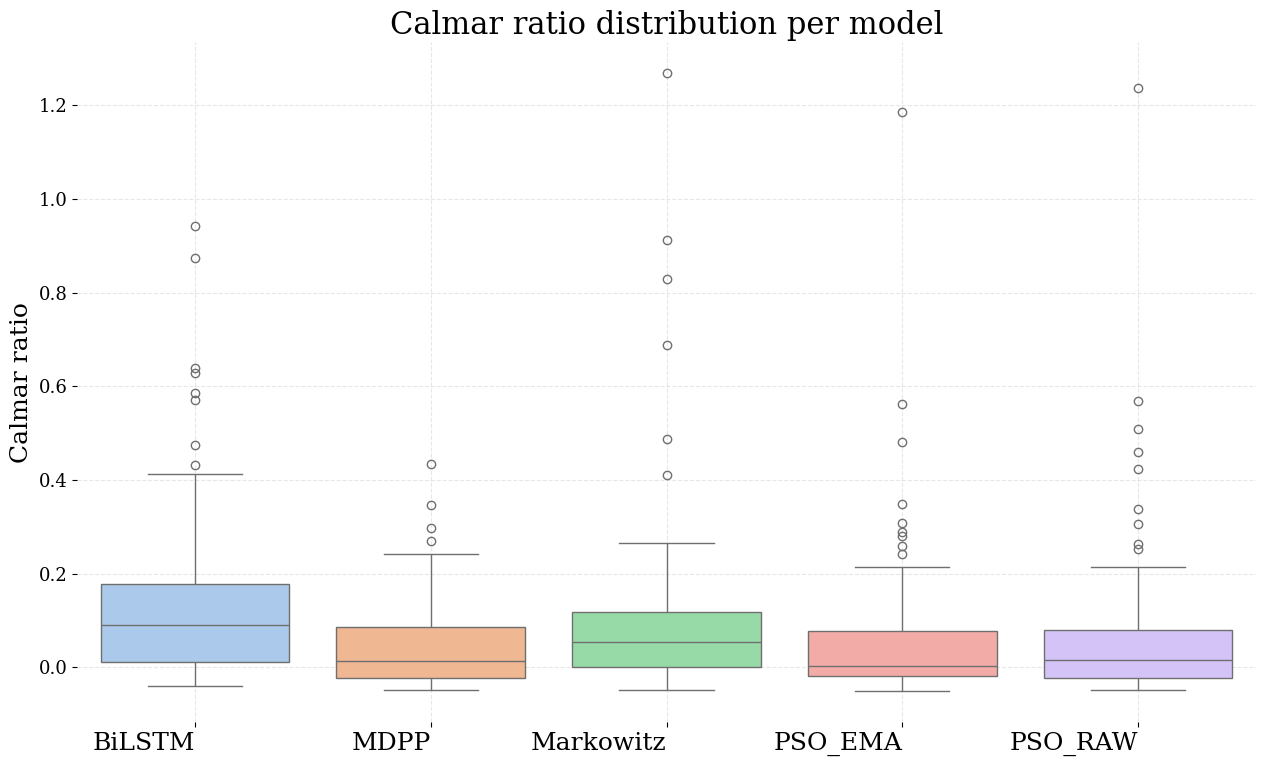

In [190]:
metrics_df = compute_metrics(df_all)

base_path = r"C:\Users\Basia\Do przejrzenia\am_sem2\mgr\plots"

plot_and_save_boxplot(
    metrics_df,
    metric="Sharpe",
    ylabel="Sharpe ratio",
    title="Sharpe ratio distribution per model",
    save_path=os.path.join(base_path, "boxplot_sharpe.pdf")
)

plot_and_save_boxplot(
    metrics_df,
    metric="Sortino",
    ylabel="Sortino ratio",
    title="Sortino ratio distribution per model",
    save_path=os.path.join(base_path, "boxplot_sortino.pdf")
)

plot_and_save_boxplot(
    metrics_df,
    metric="Calmar",
    ylabel="Calmar ratio",
    title="Calmar ratio distribution per model",
    save_path=os.path.join(base_path, "boxplot_calmar.pdf")
)


In [180]:
import pandas as pd
# Zakładamy, że wcześniej zostały przygotowane DataFrame'y: df_bilstm, df_mdpp, df_pso_ema, df_pso_raw, df_markowitz
# Łączymy je w jeden zbiorczy DataFrame

df_all_scenarios = pd.concat([
    df_bilstm,
    df_mdpp,
    df_psoema,
    df_psoraw,
    df_markowitz
], ignore_index=True)

# Usuwamy ewentualne braki danych lub duplikaty
df_all_scenarios = df_all_scenarios.dropna(subset=["Date", "Capital", "Iteration", "Model"]).drop_duplicates()

# Przechodzimy do generowania metryk
metrics_all = []

for (model, iter_id), group in df_all_scenarios.groupby(["Model", "Iteration"]):
    capital = group.sort_values("Date")["Capital"]
    returns = capital.pct_change().dropna()

    if len(returns) < 2:
        continue

    final_return = capital.iloc[-1] / capital.iloc[0] - 1
    max_dd = ((capital.cummax() - capital) / capital.cummax()).max()
    volatility = returns.std()

    sharpe = returns.mean() / returns.std() * np.sqrt(252) if returns.std() > 0 else 0
    downside = returns[returns < 0].std()
    sortino = returns.mean() / downside * np.sqrt(252) if downside > 0 else 0
    calmar = final_return / max_dd if max_dd > 0 else 0

    metrics_all.append({
        "Model": model,
        "Iteration": iter_id,
        "FinalReturn": final_return,
        "MDD": max_dd,
        "Volatility": volatility,
        "Sharpe": sharpe,
        "Sortino": sortino,
        "Calmar": calmar
    })

# Finalny zbiór metryk
df_all_metrics = pd.DataFrame(metrics_all)



# Zakładamy, że masz już dostępne metryki z poprzednich analiz w jednej z poniższych zmiennych
# Jeśli jeszcze nie masz, poniżej przykładowa agregacja na podstawie df_all_scenarios lub innych wyników

# Przykład: tworzenie df_all_metrics z rollingowych danych, jeżeli dostępne są surowe zwroty
# Tu zakładamy, że istnieje zmienna `df_all_scenarios` z kolumnami: Date, Capital, Iteration, Model

# Najpierw: obliczenie metryk per (Model, Iteration)
metrics_all = []

for (model, iter_id), group in df_all_scenarios.groupby(["Model", "Iteration"]):
    capital = group.sort_values("Date")["Capital"]
    returns = capital.pct_change().dropna()

    if len(returns) < 2:
        continue

    final_return = capital.iloc[-1] / capital.iloc[0] - 1
    max_dd = ((capital.cummax() - capital) / capital.cummax()).max()
    volatility = returns.std()

    sharpe = returns.mean() / returns.std() * np.sqrt(252) if returns.std() > 0 else 0
    downside = returns[returns < 0].std()
    sortino = returns.mean() / downside * np.sqrt(252) if downside > 0 else 0
    calmar = final_return / max_dd if max_dd > 0 else 0

    metrics_all.append({
        "Model": model,
        "Iteration": iter_id,
        "FinalReturn": final_return,
        "MDD": max_dd,
        "Volatility": volatility,
        "Sharpe": sharpe,
        "Sortino": sortino,
        "Calmar": calmar
    })

# Zbiorcza tabela metryk
df_all_metrics = pd.DataFrame(metrics_all)

# Podgląd
df_all_metrics


,Model,Iteration,FinalReturn,MDD,Volatility,Sharpe,Sortino,Calmar
0,BiLSTM,Iteration_1,0.062197,0.041356,0.009495,4.882159,11.718008,1.503938
1,BiLSTM,Iteration_10,0.074991,0.003950,0.003324,16.497585,0.000000,18.986903
2,BiLSTM,Iteration_11,-0.010367,0.017762,0.005249,-1.460761,-3.443637,-0.583687
3,BiLSTM,Iteration_12,0.028979,0.012092,0.003760,5.776246,6.664776,2.396525
4,BiLSTM,Iteration_13,0.050005,0.020064,0.008490,4.413288,12.483812,2.492254
...,...,...,...,...,...,...,...,...
494,PSO_RAW,Iteration_95,-0.057453,0.082270,0.014194,-3.038970,-4.566763,-0.698352
495,PSO_RAW,Iteration_96,-0.013380,0.087947,0.020880,-0.328996,-0.497238,-0.152133
496,PSO_RAW,Iteration_97,0.162300,0.005863,0.011180,10.289082,61.239506,27.682498
497,PSO_RAW,Iteration_98,-0.144574,0.176529,0.024402,-4.628735,-4.741331,-0.818983


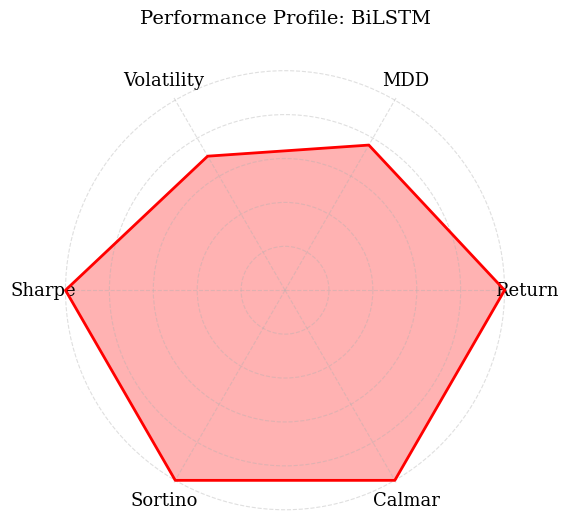

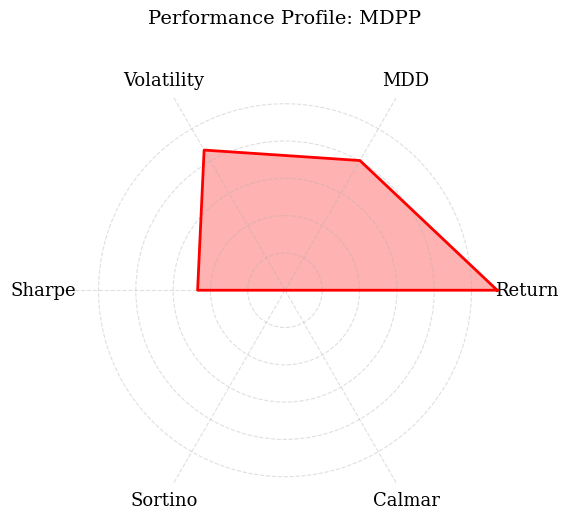

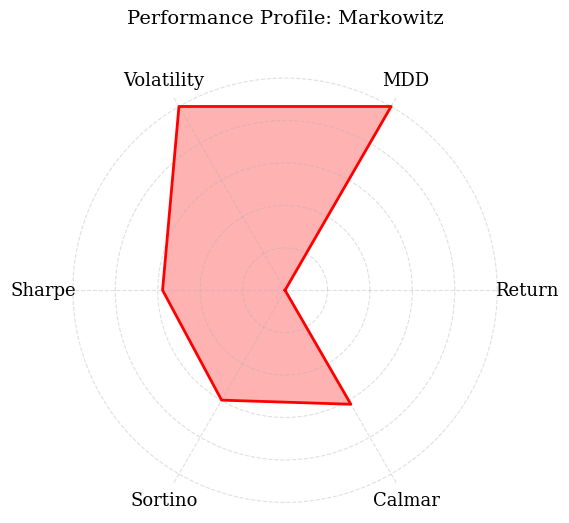

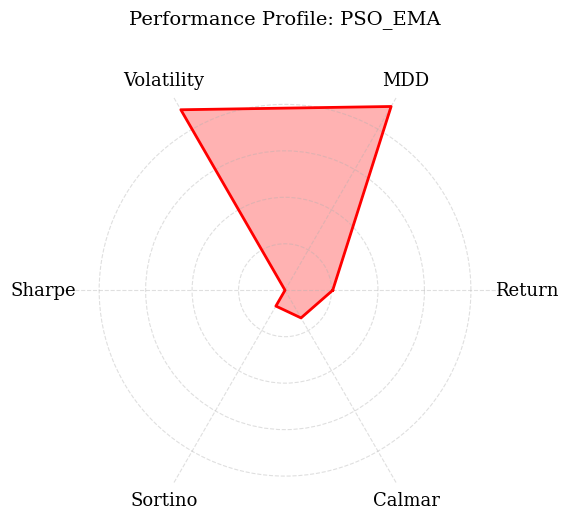

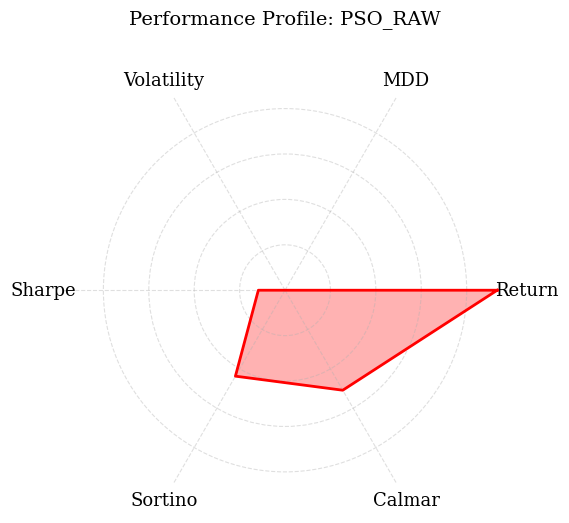

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Zakładamy, że df_all_metrics już istnieje i zawiera wszystkie metryki dla każdego modelu
# Kolumny: Model, FinalReturn, MDD, Volatility, Sharpe, Sortino, Calmar

# Średnie metryki per model
summary = df_all_metrics.groupby("Model").agg({
    "FinalReturn": "mean",
    "MDD": "mean",
    "Volatility": "mean",
    "Sharpe": "mean",
    "Sortino": "mean",
    "Calmar": "mean"
}).reset_index()

# Zmiana nazw metryk do czytelnych podpisów
summary = summary.rename(columns={
    "FinalReturn": "Return",
    "MDD": "MDD",
    "Volatility": "Volatility",
    "Sharpe": "Sharpe",
    "Sortino": "Sortino",
    "Calmar": "Calmar"
})

# Dla MDD i Volatility odwracamy wartości (bo im mniej, tym lepiej)
summary_norm = summary.copy()
summary_norm["MDD"] = -summary_norm["MDD"]
summary_norm["Volatility"] = -summary_norm["Volatility"]

# Normalizacja do 0–1
scaler = MinMaxScaler()
metric_cols = ["Return", "MDD", "Volatility", "Sharpe", "Sortino", "Calmar"]
summary_scaled = summary_norm.copy()
summary_scaled[metric_cols] = scaler.fit_transform(summary_norm[metric_cols])

# Radar plot (dla każdego modelu osobno)
def plot_radar_for_model(model_name, data_row):
    labels = metric_cols
    values = data_row[labels].values.flatten().tolist()
    values += values[:1]  # domknięcie wykresu

    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.plot(angles, values, color="red", linewidth=2)
    ax.fill(angles, values, color="red", alpha=0.3)

    ax.set_title(f"Performance Profile: {model_name}", y=1.08, fontsize=14)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_yticklabels([])
    ax.grid(True, linestyle="--", alpha=0.4)

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.tight_layout()
    plt.show()

# Generowanie wykresów radarowych
for _, row in summary_scaled.iterrows():
    plot_radar_for_model(row["Model"], row)


In [182]:
import pandas as pd
import numpy as np

# Grupowanie po modelu i obliczanie średnich metryk
summary_df = df_all_metrics.groupby("Model").agg({
    "FinalReturn": "mean",
    "MDD": "mean",
    "Volatility": "mean",
    "Sharpe": "mean",
    "Sortino": "mean",
    "Calmar": "mean"
}).round(4)

# Wyszukiwanie najlepszych wartości (gdzie większe = lepsze)
best_values = summary_df.idxmax()

# Dodanie oznaczeń do najlepszych wartości
def highlight_best(val, col_name):
    if val.name in best_values.index and best_values[col_name] == val.name:
        return f"{summary_df.loc[val.name, col_name]:.4f} ★"
    return f"{summary_df.loc[val.name, col_name]:.4f}"

# Formatowanie tabeli z oznaczeniem najlepszych
summary_table = summary_df.copy()
for col in summary_df.columns:
    summary_table[col] = summary_df.apply(lambda row: highlight_best(row, col), axis=1)

# Wyświetlenie tabeli
summary_table


,FinalReturn,MDD,Volatility,Sharpe,Sortino,Calmar
Model,,,,,,
BiLSTM,0.0265,0.0230,0.0067,3.8023,8.7207,2.9639
MDPP,0.0122,0.0486,0.0121,1.0413,2.4779,0.9855
Markowitz,0.0066,0.0123,0.0035,2.4800,6.2121,2.2133
PSO_EMA,0.0107,0.0162,0.0046,0.6747,2.9694,1.2578
PSO_RAW,0.0159,0.0577,0.0145,0.8585,3.8419,1.4885
